## **NEW INDIAN RESTAURANT IN TORONTO,CANADA**

#### **1.BUSINESS PROBLEM** 

In this project I am going to discuss what are the aspects that we should consider when we want to open a new restaurant . Here I would like discuss a particular case and discuss the factors to consider while opening  a new Indian restaurant  in Toronto, Canada. The methodology is applicable for opening of any restaurant in any location in the world provided we have adequate data to support our findings. Our problem here is the find the best location(neighbourhood) in Toronto where we can invest in a new Indian restaurant and get maximum benefit from our investment. Our target audience for this project is anyone with some interest in restaurant investment, Indian food and consider investment in Toronto, CA.   


In [1]:
!pip install beautifulsoup4
!pip install lxml
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [2]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

### **2.DATA**
The names of the neighborhoods are extracted via webscaping this wikipedia page(https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M)

In [3]:
List_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
source = requests.get(List_url).text
soup = BeautifulSoup(source, 'xml')
table=soup.find('table')

In [4]:
#dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
column_names = ['Postalcode','Borough','Neighborhood']
df= pd.DataFrame(columns = column_names)

# Search all the postcode, borough, neighborhood 
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==3:
        df.loc[len(df)] = row_data
        

In [5]:
df.head()

,Postalcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


### **DATA CLEANING**
**Ignore cells with a borough that is Not assigned**

In [6]:
# Get names of indexes for which column Borough has value "Not assigned"
indexNames = df[ df['Borough'] =='Not assigned'].index

# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

**If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.**


In [7]:
try:
    df[df['Neighborhood']=='Not assigned']=df['Borough']
except :
     print('There is no "Not Assigned" neighborhood')

There is no "Not Assigned" neighborhood


**More than one neighborhood can exist in one postal code area**

In [8]:
# More than one neighborhood can exist in one postal code area
result = df.groupby(['Postalcode','Borough'], sort=False).agg( ', '.join)
df_new=result.reset_index()
df=df_new
df.head()

,Postalcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [9]:
df.shape

(103, 3)

**Getting Longitude and Latitude**

The geographic location of the neighborhoods are available
here (http://cocl.us/Geospatial_data).

In [10]:
!wget -q -O 'Toronto_long_lat_data.csv'  http://cocl.us/Geospatial_data
geo_df=pd.read_csv('http://cocl.us/Geospatial_data')

In [11]:
geo_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


**Lets merge the two data**

In [12]:
geo_df.columns=['Postalcode','Latitude','Longitude']

Toronto_df = pd.merge(df,
                 geo_df[['Postalcode','Latitude', 'Longitude']],
                 on='Postalcode')
Toronto_df

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


**Import Income Data and Population Data**

The demographics (Total Population, Annual Family Income and Indian population )
are obtained from the Toronto Open Data Portal (http://map.toronto.ca/wellbeing).

In [13]:
demo= pd.read_csv('toronto_data.csv')
df_demo = pd.DataFrame(demo)
df_demo.drop(['Neighbourhood Id'],axis=1, inplace=True)
df_demo.drop(['Combined Indicators'],axis=1, inplace=True)

df_demo= df_demo.rename(columns={'Neighbourhood': 'Neighborhood','   South Asian':'Indian'})
df_demo.set_index(['Neighborhood'],inplace=True)
df_demo.head()

,Total Population,Average Family Income,Healthy Food Index,Indian
Neighborhood,,,,
West Humber-Clairville,33312.0,72820.0,23.82,13920.0
Mount Olive-Silverstone-Jamestown,32954.0,57411.0,37.57,11095.0
Thistletown-Beaumond Heights,10360.0,70838.0,42.26,2555.0
Rexdale-Kipling,10529.0,69367.0,23.31,1420.0
Elms-Old Rexdale,9456.0,61196.0,24.71,840.0


In [14]:
df_demo.shape

(140, 4)

**Lets merge the demographics data**

In [79]:
df_toronto= pd.merge(Toronto_df, df_demo, on='Neighborhood',how='left').dropna().reset_index(drop=True)
df_toronto.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude,Total Population,Average Family Income,Healthy Food Index,Indian
0,M4A,North York,Victoria Village,43.725882,-79.315572,17510.0,65104.0,26.90,2985.0
1,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,14365.0,105770.0,32.85,320.0
2,M4E,East Toronto,The Beaches,43.676357,-79.293031,21567.0,139757.0,31.53,645.0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,53485.0,63186.0,27.73,21545.0
4,M2H,North York,Hillcrest Village,43.803762,-79.363452,16934.0,81484.0,48.46,1525.0


**Clean data and drop unwanted columns**

In [80]:
df_toronto.drop(['Postalcode','Borough'],axis=1, inplace=True)

df_toronto.head()

,Neighborhood,Latitude,Longitude,Total Population,Average Family Income,Healthy Food Index,Indian
0,Victoria Village,43.725882,-79.315572,17510.0,65104.0,26.90,2985.0
1,Humewood-Cedarvale,43.693781,-79.428191,14365.0,105770.0,32.85,320.0
2,The Beaches,43.676357,-79.293031,21567.0,139757.0,31.53,645.0
3,Woburn,43.770992,-79.216917,53485.0,63186.0,27.73,21545.0
4,Hillcrest Village,43.803762,-79.363452,16934.0,81484.0,48.46,1525.0


**Lets visualize the data**

In [43]:
df1=df_toronto
df1.drop(['Latitude','Longitude'],axis=1, inplace=True)
df1.head()

,Neighborhood,Total Population,Average Family Income,Healthy Food Index,Indian
0,Victoria Village,17510.0,65104.0,26.90,2985.0
1,Humewood-Cedarvale,14365.0,105770.0,32.85,320.0
2,The Beaches,21567.0,139757.0,31.53,645.0
3,Woburn,53485.0,63186.0,27.73,21545.0
4,Hillcrest Village,16934.0,81484.0,48.46,1525.0


In [44]:
max_p=df1['Total Population'].max(axis=0)
max_in=df1['Average Family Income'].max(axis=0)
max_i=df1['Indian'].max(axis=0)
max_h=df1['Healthy Food Index'].max(axis=0)

In [45]:

# Normalize data so that it can be viewed in one graph
df1['Population']=df1['Total Population']/max_p 
df1['Income']=df1['Average Family Income']/max_in 
df1['Indian']=df1['Indian']/max_i
df1['Normalized Healthy Food Index']=df1['Healthy Food Index']/max_h

df1.drop(['Total Population','Average Family Income','Healthy Food Index'],axis=1, inplace=True)
df1.set_index('Neighborhood', inplace=True)
df1


,Indian,Population,Income,Normalized Healthy Food Index
Neighborhood,,,,
Victoria Village,0.138547,0.327382,0.465837,0.555097
Humewood-Cedarvale,0.014853,0.268580,0.756814,0.677879
The Beaches,0.029937,0.403235,1.000000,0.650640
Woburn,1.000000,1.000000,0.452113,0.572225
Hillcrest Village,0.070782,0.316612,0.583041,1.000000
Thorncliffe Park,0.456951,0.394653,0.354401,0.712546
Scarborough Village,0.256208,0.312686,0.440987,0.732150
Bayview Village,0.063124,0.400037,0.664010,0.662815
Humber Summit,0.166628,0.232140,0.470510,0.667148


We have chosen only 10 well separated Neighborhoods for visualization

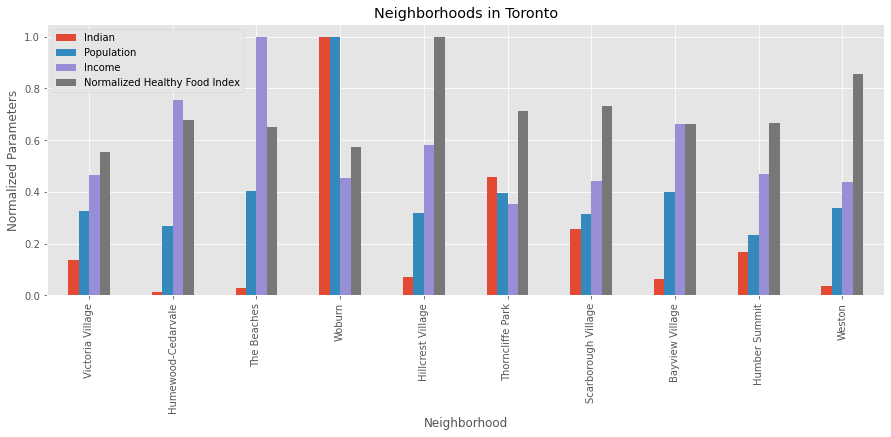

In [46]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')
df1.plot(kind='bar', figsize=(15,5))

plt.title('Neighborhoods in Toronto')
plt.xlabel('Neighborhood')
plt.ylabel('Normalized Parameters')

plt.show()

In [81]:
#df_toronto['Indian Population(Percentage)']=df_toronto['Indian'] / df_toronto['Total Population']*100 
#df_toronto.drop(['Total Population','Indian','Healthy Food Index'],axis=1, inplace=True)

df_toronto.head()

,Neighborhood,Latitude,Longitude,Total Population,Average Family Income,Healthy Food Index,Indian
0,Victoria Village,43.725882,-79.315572,17510.0,65104.0,26.90,2985.0
1,Humewood-Cedarvale,43.693781,-79.428191,14365.0,105770.0,32.85,320.0
2,The Beaches,43.676357,-79.293031,21567.0,139757.0,31.53,645.0
3,Woburn,43.770992,-79.216917,53485.0,63186.0,27.73,21545.0
4,Hillcrest Village,43.803762,-79.363452,16934.0,81484.0,48.46,1525.0


Our data is ready for analysis.
Lets explore the venues of the neighborhoods using Foursquare API

## **3.METHODOLOGY** 
**Explore and cluster the neighborhoods**

In [52]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 

Solving environment: done

# All requested packages already installed.



In [53]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library


Solving environment: done

# All requested packages already installed.



In [82]:
# get location of Toronto using geopy

address = 'Toronto'
geolocator = Nominatim(user_agent='toronto')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print("The geographical coordinates of Toronto are {}, {}".format(latitude, longitude))

The geographical coordinates of Toronto are 43.6534817, -79.3839347


To reduce computational cost, lets work with only 10 well separated neighborhoods

In [218]:
# Folium mapping
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighbourhood in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Neighborhood']):
  label = '{}'.format(neighbourhood)
  label = folium.Popup(label)
  folium.CircleMarker(
      [lat,lng],
      radius=8,
      color='blue',
      popup=label,
      fill_color='#3186cc',
      fill_opacity=0.7,
      fill=True

  ).add_to(map_Toronto)

map_Toronto

**We need FourSquare Credentials to call the API to get nearby venues**

In [56]:
CLIENT_ID = '1BQWZKDV4ABXW5Z00Y4V2ACT5QG1INSGLOCFE0OL4VG3A55I' 
CLIENT_SECRET = 'BEAKWOTBSN5RL3YI43RPBWNTO4FSRTHPNAMVCQ4XIBGPTNLX' 
VERSION = '20180605'

We are only interested in exploring the restaurant venues. Thus we have chosen to call for "Food" while creating API request 

In [83]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&section=Food&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [84]:
toronto_venues =getNearbyVenues(names=df_toronto['Neighborhood'],
                                 latitudes=df_toronto['Latitude'],
                                 longitudes=df_toronto['Longitude'])

toronto_venues


Victoria Village
Humewood-Cedarvale
The Beaches
Woburn
Hillcrest Village
Thorncliffe Park
Scarborough Village
Bayview Village
Humber Summit
Weston


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Victoria Village,43.725882,-79.315572,Sultan Of Samosas,43.718823,-79.304350,Indian Restaurant
1,Victoria Village,43.725882,-79.315572,Armenian Kitchen,43.731071,-79.305390,Middle Eastern Restaurant
2,Victoria Village,43.725882,-79.315572,Jatujak,43.736208,-79.307668,Thai Restaurant
3,Victoria Village,43.725882,-79.315572,Diwan,43.725002,-79.332019,Middle Eastern Restaurant
4,Victoria Village,43.725882,-79.315572,Damas Grillhouse & Juice Bar,43.741839,-79.309296,Mediterranean Restaurant
...,...,...,...,...,...,...,...
509,Weston,43.706876,-79.518188,Pizza Nova,43.697358,-79.501593,Pizza Place
510,Weston,43.706876,-79.518188,Pizza Nova,43.692817,-79.531570,Pizza Place
511,Weston,43.706876,-79.518188,2 Bros Cuisine,43.692499,-79.531698,Middle Eastern Restaurant
512,Weston,43.706876,-79.518188,Pizza Nova,43.723060,-79.509217,Pizza Place


In [85]:
print('The "Toronto" dataframe has {} venues and {} unique venue types.'.format(
      len(toronto_venues['Venue Category']),
      len(toronto_venues['Venue Category'].unique())))

The "Toronto" dataframe has 514 venues and 59 unique venue types.


In [86]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bayview Village,26,26,26,26,26,26
Hillcrest Village,48,48,48,48,48,48
Humber Summit,23,23,23,23,23,23
Humewood-Cedarvale,100,100,100,100,100,100
Scarborough Village,37,37,37,37,37,37
The Beaches,88,88,88,88,88,88
Thorncliffe Park,70,70,70,70,70,70
Victoria Village,48,48,48,48,48,48
Weston,40,40,40,40,40,40


Lets create a map and superimpose the venues on top of it

In [249]:
# create map of Manhattan using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)


# add markers to map
for lat, lng, label in zip(toronto_venues['Venue Latitude'], toronto_venues['Venue Longitude'], toronto_venues['Venue Category']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

**Clustering**

In [87]:
Restaurant_freq=toronto_venues.groupby('Neighborhood').count()
Restaurant_freq.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'],axis=0, inplace=True)
Restaurant_freq.drop(columns=['Venue Category'],axis=0, inplace=True)

Restaurant_freq

,Venue
Neighborhood,
Bayview Village,26
Hillcrest Village,48
Humber Summit,23
Humewood-Cedarvale,100
Scarborough Village,37
The Beaches,88
Thorncliffe Park,70
Victoria Village,48
Weston,40


In [88]:
df_final= pd.merge(df_toronto,Restaurant_freq, on='Neighborhood')
df_final.drop(columns=['Latitude','Longitude'],axis=0, inplace=True)
df_final.head()


,Neighborhood,Total Population,Average Family Income,Healthy Food Index,Indian,Venue
0,Victoria Village,17510.0,65104.0,26.90,2985.0,48
1,Humewood-Cedarvale,14365.0,105770.0,32.85,320.0,100
2,The Beaches,21567.0,139757.0,31.53,645.0,88
3,Woburn,53485.0,63186.0,27.73,21545.0,34
4,Hillcrest Village,16934.0,81484.0,48.46,1525.0,48


In [89]:
df_final.shape

(10, 6)

In [90]:
# set number of clusters
kclusters = 3

toronto_grouped_clustering = df_final.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=int(kclusters), random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_


array([0, 1, 1, 2, 0, 0, 0, 1, 0, 0], dtype=int32)

In [91]:
df_toronto

,Neighborhood,Latitude,Longitude,Total Population,Average Family Income,Healthy Food Index,Indian
0,Victoria Village,43.725882,-79.315572,17510.0,65104.0,26.90,2985.0
1,Humewood-Cedarvale,43.693781,-79.428191,14365.0,105770.0,32.85,320.0
2,The Beaches,43.676357,-79.293031,21567.0,139757.0,31.53,645.0
3,Woburn,43.770992,-79.216917,53485.0,63186.0,27.73,21545.0
4,Hillcrest Village,43.803762,-79.363452,16934.0,81484.0,48.46,1525.0
5,Thorncliffe Park,43.705369,-79.349372,21108.0,49530.0,34.53,9845.0
6,Scarborough Village,43.744734,-79.239476,16724.0,61631.0,35.48,5520.0
7,Bayview Village,43.786947,-79.385975,21396.0,92800.0,32.12,1360.0
8,Humber Summit,43.756303,-79.565963,12416.0,65757.0,32.33,3590.0
9,Weston,43.706876,-79.518188,17992.0,61470.0,41.45,765.0


In [93]:
df_loc=df_toronto
df_loc.drop(['Average Family Income','Indian','Healthy Food Index','Total Population'],axis=1, inplace=True)

In [94]:
# add clustering labels
df_final.insert(0,'Cluster',kmeans.labels_)

toronto_merged =df_final
# merge with df_toronto to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(df_loc.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head(10)

,Cluster,Neighborhood,Total Population,Average Family Income,Healthy Food Index,Indian,Venue,Latitude,Longitude
0,0,Victoria Village,17510.0,65104.0,26.90,2985.0,48,43.725882,-79.315572
1,1,Humewood-Cedarvale,14365.0,105770.0,32.85,320.0,100,43.693781,-79.428191
2,1,The Beaches,21567.0,139757.0,31.53,645.0,88,43.676357,-79.293031
3,2,Woburn,53485.0,63186.0,27.73,21545.0,34,43.770992,-79.216917
4,0,Hillcrest Village,16934.0,81484.0,48.46,1525.0,48,43.803762,-79.363452
5,0,Thorncliffe Park,21108.0,49530.0,34.53,9845.0,70,43.705369,-79.349372
6,0,Scarborough Village,16724.0,61631.0,35.48,5520.0,37,43.744734,-79.239476
7,1,Bayview Village,21396.0,92800.0,32.12,1360.0,26,43.786947,-79.385975
8,0,Humber Summit,12416.0,65757.0,32.33,3590.0,23,43.756303,-79.565963
9,0,Weston,17992.0,61470.0,41.45,765.0,40,43.706876,-79.518188


**Visualise the cluster**

In [95]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## **4.Result**

Lets look at each neighborhood 

In [101]:
cluster=toronto_merged
cluster.set_index(['Neighborhood'],inplace=True)
cluster.drop(columns=['Latitude','Longitude'],axis=0, inplace=True)


In [97]:
cluster.loc[toronto_merged['Cluster'] == 0]

,Cluster,Total Population,Average Family Income,Healthy Food Index,Indian,Venue
Neighborhood,,,,,,
Victoria Village,0,17510.0,65104.0,26.90,2985.0,48
Hillcrest Village,0,16934.0,81484.0,48.46,1525.0,48
Thorncliffe Park,0,21108.0,49530.0,34.53,9845.0,70
Scarborough Village,0,16724.0,61631.0,35.48,5520.0,37
Humber Summit,0,12416.0,65757.0,32.33,3590.0,23
Weston,0,17992.0,61470.0,41.45,765.0,40


CLUSTER:0
Income:Moderate
Indian:High
Total Population:Moderate
Venue:Moderate

In [98]:
cluster.loc[toronto_merged['Cluster'] == 1]

,Cluster,Total Population,Average Family Income,Healthy Food Index,Indian,Venue
Neighborhood,,,,,,
Humewood-Cedarvale,1,14365.0,105770.0,32.85,320.0,100
The Beaches,1,21567.0,139757.0,31.53,645.0,88
Bayview Village,1,21396.0,92800.0,32.12,1360.0,26


In [ ]:
CLUSTER:0
Income:High
Indian:Moderate
Total Population:High
Venue:High

In [99]:
cluster.loc[toronto_merged['Cluster'] == 2]

,Cluster,Total Population,Average Family Income,Healthy Food Index,Indian,Venue
Neighborhood,,,,,,
Woburn,2,53485.0,63186.0,27.73,21545.0,34


In [ ]:
CLUSTER:2
Income:High
Indian:High
Venue:Low

## **5.Conclusion**

If we look at the cluster we can say that "Bayview Village" and "Woburn" will be the two best options to open an Indian restaurant

Bayview Village:
In Bayview Village,Average Family Income is very high which signifies the spending power of the average population. Also it has very limited food venues. Thus a new restaurant will have less competition.

"Woburn":
Woburn is much crowded compared to other neighborhood. Thus there will be more demand. Its spending power is average. But it has limited food venues which ensures less competition for a new restaurant.

Thus Bayview Village and Woburn are two great location from our analysis.
Comparing the 'Healthy Food Index' of the two neighborhoods, it is recommended to go for more luxurious(posh) for Bayview Village neighborhood and a moderate less expensive restaurant for Woburn neighborhood.



